In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
import string
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import numpy as np #to get the color of our image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mayuk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [62]:
df = pd.read_csv(r'D:\Fake News Detection\final_dataset.csv')

In [63]:
df.head()

,Tweets,target(fake=0)
0,Global COVID-19 prevention trial of hydroxychl...,0.0
1,akshaykumar & AnupamPKher He uses gomutra inst...,0.0
2,"Samples of Patanjali taken for testing, says...",0.0
3,"If Corinil is found to be good, then PypAyurve...",0.0
4,Many government agencies have claimed that the...,0.0


In [64]:
df.shape

(3067, 2)

In [65]:
# Removing URls
def remove_URL(text):
    url = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    return url

# Remove HTML Tags
def remove_html(text):
    html = re.sub(r'<.*?>' , '' , text)
    return html

# Remove Emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                                "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Lower
def lower(text):
    text = text.lower()
    return text

# Stopwords
def stop_word(text):
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]
    text = " ".join(text)
    return text

# Remove Punctuation
'''
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
'''
def remove_punct(text):
    text = re.sub(r"[^A-Za-z0-9 ]" , "" , text)
    return text
#substitute words


In [66]:
df['Tweets'] = df['Tweets'].apply(lambda x : remove_URL(x))
df['Tweets'] = df['Tweets'].apply(lambda x : remove_html(x))
df['Tweets'] = df['Tweets'].apply(lambda x : remove_emoji(x))
df['Tweets'] = df['Tweets'].apply(lambda x : lower(x))
df['Tweets'] = df['Tweets'].apply(lambda x : stop_word(x))
df['Tweets'] = df['Tweets'].apply(lambda x : remove_punct(x))

In [67]:
df.head()

,Tweets,target(fake=0)
0,global covid19 prevention trial hydroxychloroq...,0.0
1,akshaykumar anupampkher uses gomutra instead ...,0.0
2,samples patanjali taken testing says uttarakha...,0.0
3,corinil found good pypayurved also add little ...,0.0
4,many government agencies claimed medicines cur...,0.0


In [68]:
# Lemmatization

lemmatizer = WordNetLemmatizer()

for i in range (len(df)):
    tweet = df.loc[i , "Tweets"]
    tweet = [lemmatizer.lemmatize(word) for word in tweet.split()]
    df.loc[i , "Tweets"] = " ".join(tweet)

In [69]:
df.head()

,Tweets,target(fake=0)
0,global covid19 prevention trial hydroxychloroq...,0.0
1,akshaykumar anupampkher us gomutra instead pet...,0.0
2,sample patanjali taken testing say uttarakhand...,0.0
3,corinil found good pypayurved also add little ...,0.0
4,many government agency claimed medicine cure c...,0.0


In [70]:
# Stemming

ps = PorterStemmer()

for i in range (len(df)):
    tweet = df.loc[i , "Tweets"]
    tweet = [ps.stem(word) for word in tweet.split()]
    df.loc[i , "Tweets"] = " ".join(tweet)

In [71]:
df.head()

,Tweets,target(fake=0)
0,global covid19 prevent trial hydroxychloroquin...,0.0
1,akshaykumar anupampkh us gomutra instead petro...,0.0
2,sampl patanjali taken test say uttarakhand ayu...,0.0
3,corinil found good pypayurv also add littl bit...,0.0
4,mani govern agenc claim medicin cure coronaviru,0.0


In [72]:
fake = ''
for i in range(len(df[df["target(fake=0)"]==0])):
    sentence = df[df["target(fake=0)"]==0].reset_index(drop=True).loc[i,"Tweets"]
    fake += sentence+" "

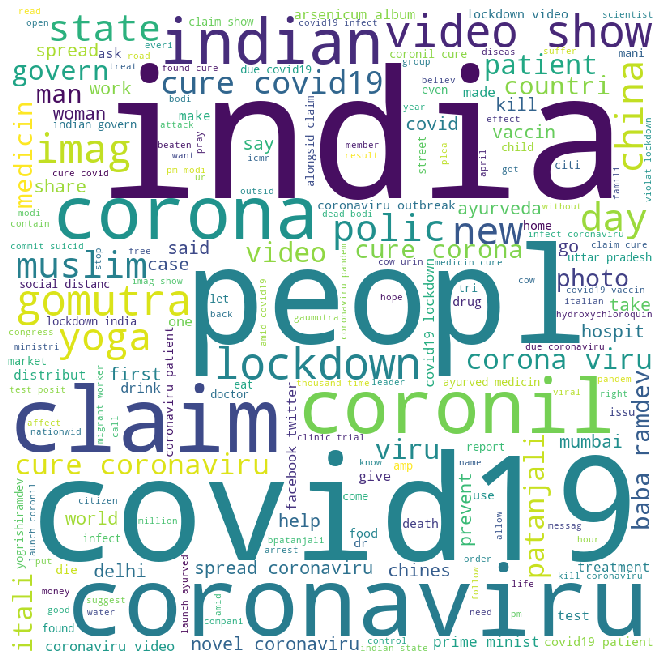

In [88]:
 
wordcloud_truth = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(fake)
plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloud_truth) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

wc.to_file('fakebore_wordcloud.png')



In [78]:
truth = ''
for i in range(len(df[df["target(fake=0)"]==1])):
    sentence = df[df["target(fake=0)"]==1].reset_index(drop=True).loc[i,"Tweets"]
    truth += sentence+" "

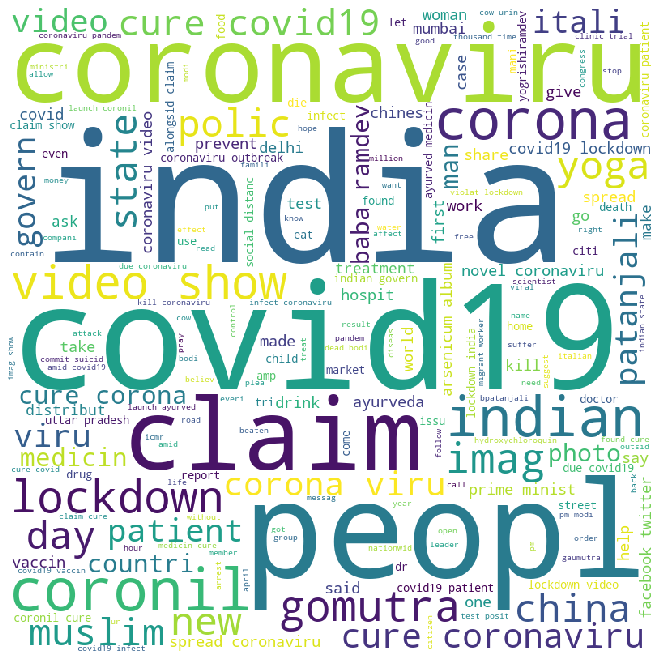

In [87]:
 
wordcloud_truth = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(fake)
plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloud_truth) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()
wc.to_file('truthbore_wordcloud.png')
